# PW6 – Strom- und Spannungsquellen

 Solarzellen als Gleichstromquelle
---

### Elektrische Quellen
Ein Stromkreis besteht aus Erzeugern und Verbrauchern elektrischer Energie.  
Eine **Spannungsquelle** hält ihre Spannung konstant, unabhängig von der Belastung.  
Eine **Stromquelle** hält den Strom konstant, auch wenn sich der Widerstand ändert.  
In der Praxis sind beide nicht ideal – sie besitzen einen Innenwiderstand.  
Die **Solarzelle** ist eine Gleichstromquelle.

---

### Die Solarzelle
Sie wandelt Lichtenergie in elektrische Energie um (**innerer Photoeffekt**).  
Photonen mit Energie $h \nu \le \varepsilon(G)$ regen Elektronen im Halbleiter an, wodurch frei bewegliche Elektronen und Löcher entstehen.  
Durch **Dotierung** entsteht ein **p-n-Übergang** mit einer **Sperrschicht** und einem elektrischen Feld, das die Ladungsträger trennt.  

Bei Beleuchtung wirkt die Solarzelle wie eine **Stromquelle parallel zu einer Diode** – ohne Licht nur wie eine Diode.

---

### Strom-Spannungs-Kennlinie
Die Stromquelle liefert einen lichtabhängigen Strom $I_{l}$, unabhängig vom Lastwiderstand $R_{l}$:

$$
I_{ext} = I_L - I_D
$$

Zwei wichtige Punkte:
- **Kurzschlussstrom** $I(KS):  R_L = 0, \, U_{ext} = 0$
- **Leerlaufspannung** $U(LL):  R_L = \infty, \, I_{ext} = 0$

Die elektrische Leistung lautet:

$$
P_{ext} = U_{ext} \cdot I_{ext}
$$

Das Maximum $P_{max}$ tritt bei $R_{L,max}$ auf.

---

### Kurvenfüllfaktor (CFF)
$$
CFF = \frac{P_{max}}{I_{KS} \cdot U_{LL}}
$$
Er beschreibt, wie ideal die Kennlinie ist. Gute Solarzellen: $CFF \approx 0.8–0.9$

---

### Wirkungsgrad
Der Wirkungsgrad ist das Verhältnis von abgegebener elektrischer zu eingestrahlter Energie.  
Für optimale Leistung wird der Lastwiderstand elektronisch angepasst (Impedanzwandler).


Zusammenfassung (Schwächere Beleuchtung):
I_KS  = (0.0163101 ± 2.8e-05) A
U_LL  = (3.2859 ± 0.00666) V
P_max = (0.0366948 ± 0.016) W
RL@Pmax = (170.377 ± 24.015) Ohm
CFF   = 0.68469 ± 0.193

Zusammenfassung (Stärkere Beleuchtung):
I_KS  = (0.0261529 ± 7e-06) A
U_LL  = (3.24529 ± 0.38756) V
P_max = (0.066443 ± 0.005) W
RL@Pmax = (113.659 ± 19.397) Ohm
CFF   = 0.782846 ± 0.005

 Alle Fehler sind mittels Gauss'scher Fehlerfortpflanzung berechnet.


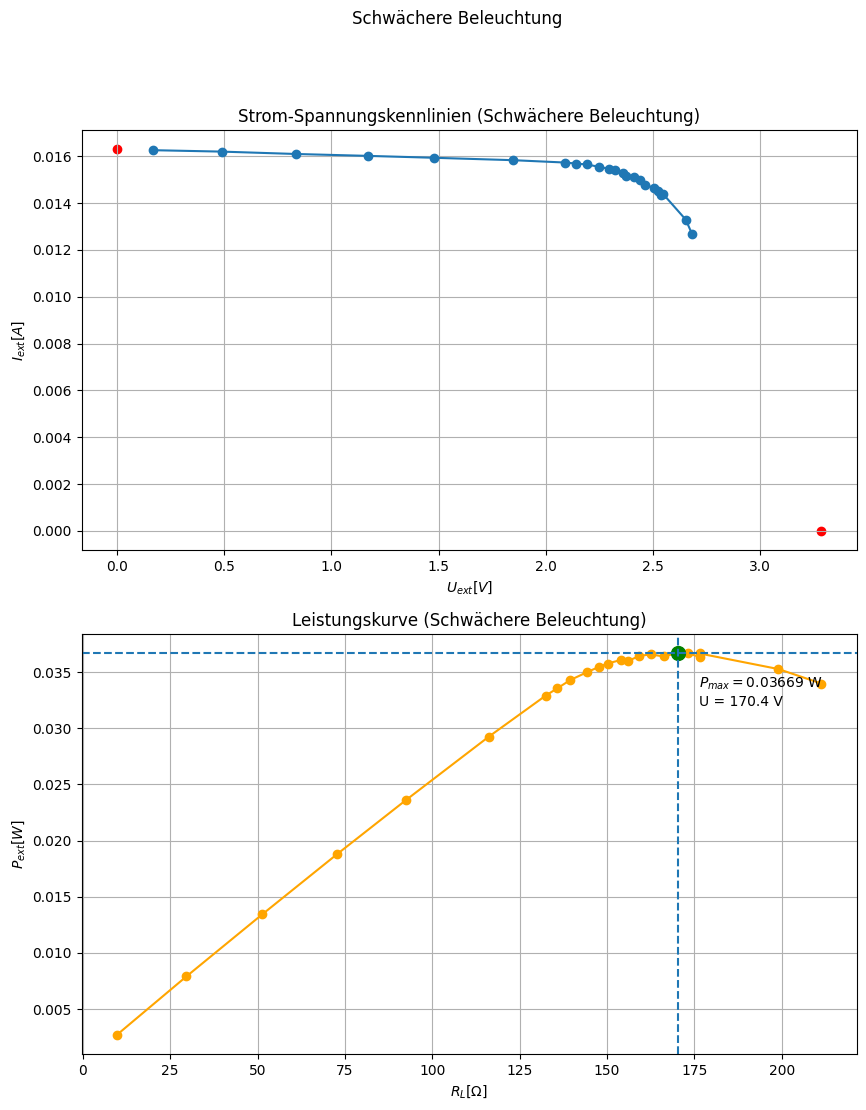

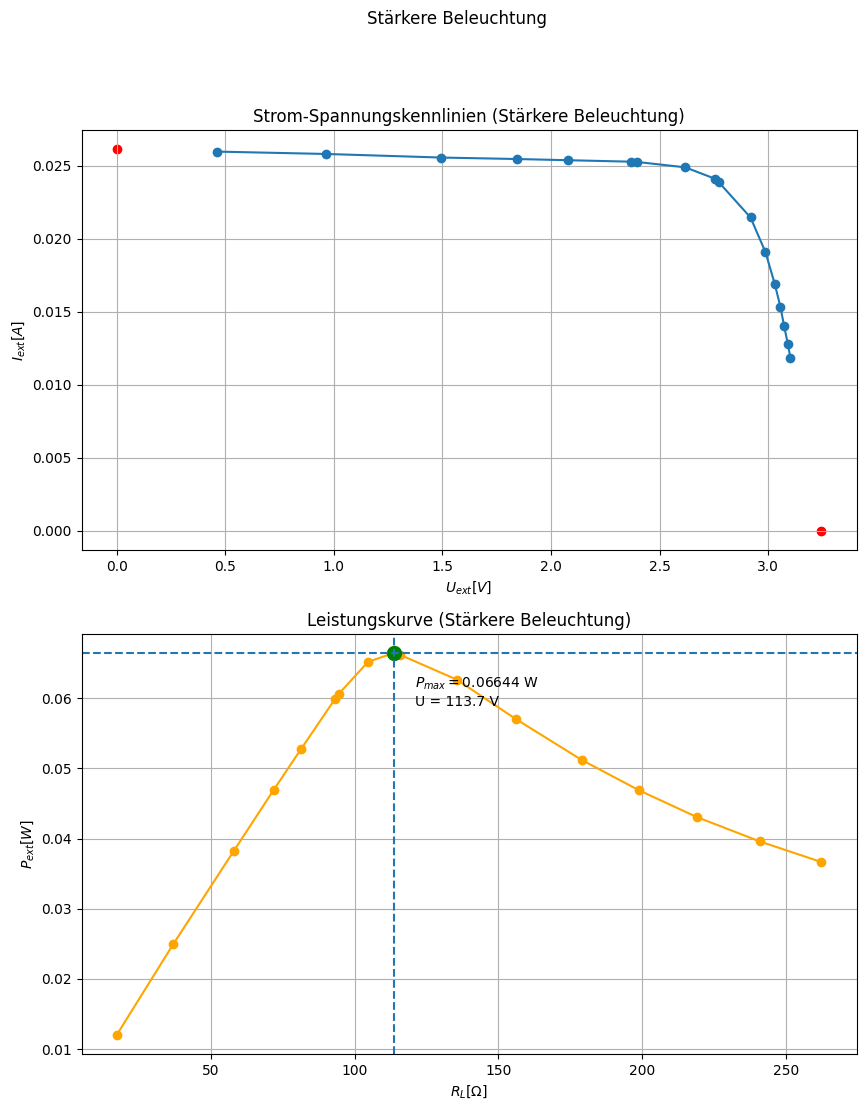

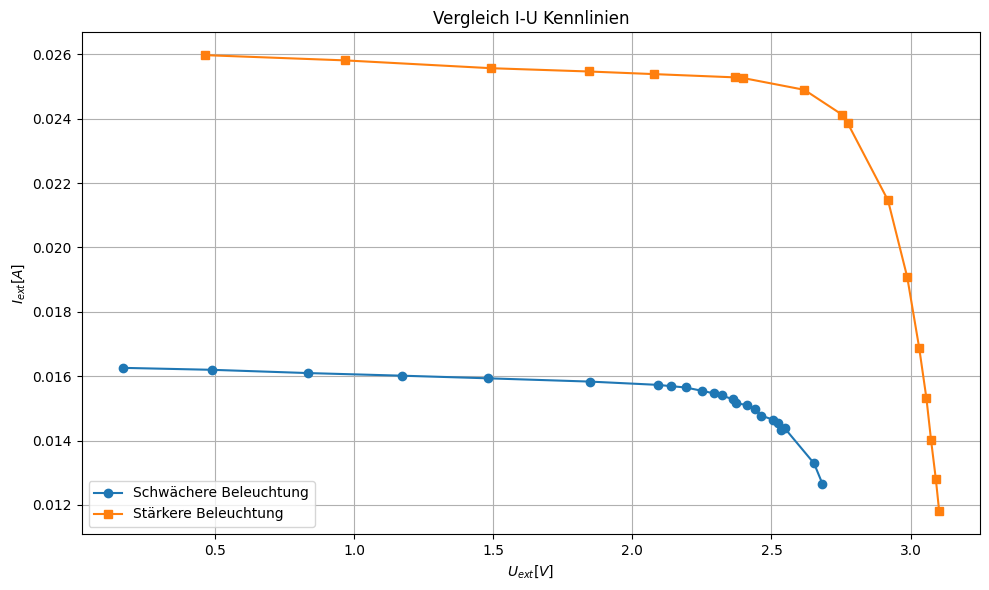

In [51]:
# -*- coding: utf-8 -*-
"""
Analyse-Toolkit fuer Experiment 1 (Solarzellen als Gleichstromquelle)
Daten werden direkt im Code eingetragen.

Hinweise:
- Kommentare sind auf Deutsch und nur ASCII-Zeichen.
- Grundlage ist PW6: I(U)-Kennlinie, Extrapolation zu I_KS und U_LL,
  Leistungskennlinie P(U), Bestimmung von P_max, R_L,max und CFF.
- Messgroessen:
  U_ext_V   = Klemmenspannung an der Solarzelle
  U_shunt_V = Spannung am Messwiderstand R_I (UI), daraus I = UI / R_I

So trage die Daten ein:
- Fuellen Sie DATA_LOW und DATA_HIGH mit Tupeln (U_ext_V, U_shunt_V)
  in aufsteigender Reihenfolge der U_ext_V (empfohlen).
- Beispiel (nur als Kommentar):
  DATA_LOW = [
      (0.02, 0.095), (0.10, 0.090), (0.20, 0.085), (0.40, 0.070),
      (0.60, 0.055), (0.80, 0.040), (0.95, 0.025), (1.00, 0.015), (1.02, 0.008)
  ]
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import Tuple, Dict, List

# ------------------------------
# Nutzereingaben im Code
# ------------------------------
import math


# --------- Hilfsfunktion ---------
def _u_abs(v, p_pct, digits, resolution_V):
    """
    Berechnet |Unsicherheit| = p% vom Messwert + digits * Auflösung.
    v: Messwert in V (float)
    p_pct: Prozentangabe, z.B. 0.8 für 0,8 %
    digits: Anzahl der Digits aus der Spezifikation (int)
    resolution_V: Auflösung in V (float)
    """
    percent_term = abs(v) * (p_pct / 100.0)
    digit_term   = digits * resolution_V
    return percent_term + digit_term, percent_term, digit_term

# --------- Bereichs-Funktionen (alle Eingaben/Ergebnisse in Volt) ---------

def u_dc_40mV(v):
    """Bereich 40 mV, Auflösung 0,01 mV, Genauigkeit ±(0,8% + 3 Digit)."""
    assert abs(v) <= 0.040, "Messwert liegt nicht im Bereich 40 mV"
    return _u_abs(v, p_pct=0.8, digits=3, resolution_V=0.01e-3)

def u_dc_400mV(v):
    """Bereich 400 mV, Auflösung 0,1 mV, Genauigkeit ±(0,8% + 3 Digit)."""
    assert abs(v) <= 0.400, "Messwert liegt nicht im Bereich 400 mV"
    return _u_abs(v, p_pct=0.8, digits=3, resolution_V=0.1e-3)

def u_dc_4V(v):
    """Bereich 4 V, Auflösung 0,001 V, Genauigkeit ±(0,5% + 1 Digit)."""
    assert abs(v) <= 4.0, "Messwert liegt nicht im Bereich 4 V"
    return _u_abs(v, p_pct=0.5, digits=1, resolution_V=0.001)

def u_dc_40V(v):
    """Bereich 40 V, Auflösung 0,01 V, Genauigkeit ±(0,5% + 1 Digit)."""
    assert abs(v) <= 40.0, "Messwert liegt nicht im Bereich 40 V"
    return _u_abs(v, p_pct=0.5, digits=1, resolution_V=0.01)

def u_dc_400V(v):
    """Bereich 400 V, Auflösung 0,1 V, Genauigkeit ±(0,5% + 1 Digit)."""
    assert abs(v) <= 400.0, "Messwert liegt nicht im Bereich 400 V"
    return _u_abs(v, p_pct=0.5, digits=1, resolution_V=0.1)

def u_dc_600V(v):
    """Bereich 600 V, Auflösung 1 V, Genauigkeit ±(1,0% + 3 Digit)."""
    assert abs(v) <= 600.0, "Messwert liegt nicht im Bereich 600 V"
    return _u_abs(v, p_pct=1.0, digits=3, resolution_V=1.0)

# --------- (Optional) Dispatcher: wählt automatisch den kleinsten passenden Bereich ---------

def u_dc_auto(v):
    """
    Gibt (unsicherheit_abs, percent_term, digit_term, benutzter_bereich) zurück.
    Bereich wird so gewählt, dass |v| hineinpasst und der Bereich minimal ist.
    """
    absv = abs(v)
    if absv <= 0.040:   u, p, d = u_dc_40mV(v);   return u, p, d, "40 mV"
    if absv <= 0.400:   u, p, d = u_dc_400mV(v);  return u, p, d, "400 mV"
    if absv <= 4.0:     u, p, d = u_dc_4V(v);     return u, p, d, "4 V"
    if absv <= 40.0:    u, p, d = u_dc_40V(v);    return u, p, d, "40 V"
    if absv <= 400.0:   u, p, d = u_dc_400V(v);   return u, p, d, "400 V"
    if absv <= 600.0:   u, p, d = u_dc_600V(v);   return u, p, d, "600 V"
    raise ValueError("Messwert liegt außerhalb des 600-V-Bereichs")

# Messwiderstand fuer Strommessung (R_I). Den genauen Wert vom Gehaeuse uebernehmen.
R_I_OHM = 0.492  # anpassen

# Anzahl der Randpunkte fuer lineare Extrapolation
N_FIT = 5  # anpassen je nach Punktdichte

#H_LOW = (11.5 ± 0.1) cm
DATA_LOW: List[Tuple[float, float]] = [ 
    (0.1664, 0.008), (0.488, 0.00797), (0.835, 0.00792), (1.173, 0.00788), (1.481, 0.00784), (1.847, 0.00779), (2.139, 0.00772), (2.373, 0.00746),
    (2.536, 0.00705), (2.653, 0.00654), (2.463, 0.00727), (2.091, 0.00774), (2.191, 0.0077), (2.249, 0.00765), (2.293, 0.00761), (2.321, 0.00758),
    (2.413, 0.00743), (2.36, 0.00752), (2.441, 0.00737), (2.504, 0.00721), (2.524, 0.00715), (2.547, 0.00708), (2.683, 0.00623)
]

#H_HIGH = (7 ± 0.1)cm
DATA_HIGH: List[Tuple[float, float]] = [
    (0.4624, 0.01278), (0.965, 0.0127), (2.774, 0.01174), (3.074, 0.00689), (2.37, 0.01244),
    (2.919, 0.01056), (2.988, 0.00939), (3.031, 0.00831), (3.057, 0.00754), (3.091, 0.0063), 
    (3.103, 0.00581), (2.398, 0.01243), (2.618, 0.01225), (2.754, 0.01187), (1.493, 0.01258),
    (1.843, 0.01253), (2.077, 0.01249)
]

dU_ext_low = []
for U_ext, U_shunt in DATA_LOW:
    du_ext, _, _, _   = u_dc_auto(U_ext)
    dU_ext_low = [].append(du_ext)

dU_ext_high = []
for U_ext, U_shunt in DATA_HIGH:
    du_ext, _, _, _   = u_dc_auto(U_ext)
    dU_ext_high.append(du_ext)

# Dateinamenpraefixe fuer Ausgaben
OUT_PREFIX_LOW = "Schwächere Beleuchtung"
OUT_PREFIX_HIGH = "Stärkere Beleuchtung"



errors = {
    OUT_PREFIX_LOW : [0.000028, 0.00666, 0.016, 24.015, 0.193], 
    OUT_PREFIX_HIGH: [0.000007, 0.38756, 0.005, 19.397, 0.005]}

@dataclass
class IVResults:
    U: np.ndarray           # Klemmenspannung
    I: np.ndarray           # Strom
    P: np.ndarray           # Leistung
    RL: np.ndarray          # Lastwiderstand
    I_KS: float             # Kurzschlussstrom (Extrapolation U->0)
    U_LL: float             # Leerlaufspannung (Extrapolation I->0)
    P_max: float            # Maximale Leistung
    RL_at_Pmax: float       # Lastwiderstand am Leistungsmaksimum
    CFF: float              # Kurvenfuellfaktor


# ------------------------------
# Hilfsfunktionen
# ------------------------------
def tuples_to_arrays(data: List[Tuple[float, float]]) -> Tuple[np.ndarray, np.ndarray]:
    """
    Wandelt Liste von (U_ext_V, U_shunt_V) in Arrays U, UI um.
    Sortiert nach U aufsteigend, falls noetig.
    """
    if len(data) == 0:
        raise ValueError("Keine Messdaten eingetragen. Bitte DATA_LOW und DATA_HIGH befuellen.")
    arr = np.array(data, dtype=float)
    if arr.ndim != 2 or arr.shape[1] != 2:
        raise ValueError("Datenformat ungueltig. Erwartet Liste von (U_ext_V, U_shunt_V).")
    U = arr[:, 0]
    UI = arr[:, 1]
    idx = np.argsort(U)
    return U[idx], UI[idx]


def compute_current(UI: np.ndarray, R_I: float) -> np.ndarray:
    """
    I = U_shunt / R_I
    """
    return UI / R_I


def linear_extrapolation_x0(x: np.ndarray, y: np.ndarray) -> float:
    """
    Lineare Regression y = a*x + b und Rueckgabe von y(x=0) = b.
    """
    A = np.vstack([x, np.ones_like(x)]).T
    a, b = np.linalg.lstsq(A, y, rcond=None)[0]
    return b


def linear_extrapolation_y0(x: np.ndarray, y: np.ndarray) -> float: 
    """ Lineare Regression y = a*x + b und Rueckgabe von x bei y=0: x0 = -b/a. """ 
    A = np.vstack([x, np.ones_like(x)]).T 
    a, b = np.linalg.lstsq(A, y, rcond=None)[0] 
    if np.isclose(a, 0.0): 
        return np.nan 
    return -b / a

def compute_power(U: np.ndarray, I: np.ndarray) -> np.ndarray:
    return U * I


def compute_RL(U: np.ndarray, I: np.ndarray) -> np.ndarray:
    """
    RL = U / I, mit Behandlung der Faelle nahe I=0.
    """
    RL = np.full_like(U, np.nan, dtype=float)
    nonzero = np.abs(I) > 1e-12
    RL[nonzero] = U[nonzero] / I[nonzero] - R_I_OHM
    return RL


def find_pmax(U: np.ndarray, I: np.ndarray, P: np.ndarray) -> Tuple[float, float]:
    """
    Findet P_max und den zugehoerigen RL.
    """
    idx = np.nanargmax(P)
    P_max = float(P[idx])
    RL_at = np.nan
    if np.abs(I[idx]) > 1e-12:
        RL_at = float(U[idx] / I[idx] - R_I_OHM) 
    return P_max, RL_at

def _auto_n_fit(n_fit_wish: int, n_points:int) -> int:
    """
    Waehlt eine sinnvolle Anzahl Randpunkte fuer lineare Extrapolation.
    Regeln:
    - mindestens 2
    - maximal n_points // 3 (damit die Randbereiche nicht zu gross sind)
    - falls sehr wenige Punkte vorhanden sind, nimmt die Funktion automatisch 2
    """
    if n_points < 4:
        # Mit <4 Punkten ist eine zuverlaessige Extrapolation nicht sinnvoll
        raise ValueError("Zu wenige Datenpunkte insgesamt. Bitte mehr Messwerte aufnehmen.")
    n = min(n_fit_wish, max(2, n_points // 3))
    n = max(2, n)  # Sicherheitsnetz
    return n

def eval_dataset(U: np.ndarray, I: np.ndarray, n_fit_wish: int) -> Dict[str, float]:
    """
    Extrapolationen:
    - I_KS: lineare Extrapolation der ersten n_fit Punkte auf U=0
    - U_LL: lineare Extrapolation der letzten  n_fit Punkte auf I=0
    """
    n_points = len(U)
    n_fit = _auto_n_fit(n_fit_wish, n_points)

    U_lo = U[:n_fit]
    I_lo = I[:n_fit]
    I_KS = float(linear_extrapolation_x0(U_lo, I_lo))
    U_hi = U[-2:]
    I_hi = I[-2:]
    U_LL = float(linear_extrapolation_y0(U_hi, I_hi))
    return {"I_KS": I_KS, "U_LL": U_LL}


def compute_cff(P_max: float, I_KS: float, U_LL: float) -> float:
    """
    CFF = P_max / (I_KS * U_LL)
    """
    denom = I_KS * U_LL
    if np.isclose(denom, 0.0):
        return np.nan
    return float(P_max / denom)


def analyze_from_tuples(data_tuples: List[Tuple[float, float]],
                        R_I: float,
                        n_fit: int,
                        out_prefix: str,
                        XR) -> IVResults:
    """
    Vollanalyse fuer einen Datensatz:
    - Umwandlung der Tupel in Arrays
    - Strom berechnen, Sortierung sicherstellen
    - Extrapolation I_KS und U_LL
    - P(U) und RL(U)
    - P_max, RL_at_Pmax, CFF
    """
    U, UI = tuples_to_arrays(data_tuples)
    I = compute_current(UI, R_I)
    P = compute_power(U, I)
    RL = compute_RL(U, I)

    ex = eval_dataset(U, I, n_fit)
    I_KS = ex["I_KS"]
    U_LL = ex["U_LL"]

    P_max, RL_at = find_pmax(U, I, P)
    idx_max = int(np.nanargmax(P))
    U_at_Pmax = float(U[idx_max])
    I_at_Pmax = float(I[idx_max])
    CFF = compute_cff(P_max, I_KS, U_LL)

    # Export Tabellen
    df_out = pd.DataFrame({
        "U_V": U,
        "U_shunt_V": UI,
        "I_A": I,
        "P_W": P,
        "RL_Ohm": RL
    })
    df_out.to_csv(f"{out_prefix}_iv_processed.csv", index=False)

    # Plots (je Plot separat, keine Farbangaben)
    fig, (ax1, ax2) = plt.subplots(2, 1,  figsize=(10, 12))
    fig.suptitle(f"{out_prefix}")
    
    ax1.errorbar(U, I, xerr=XR, marker = "o")
    ax1.set(xlabel=r"$U_{ext} [V]$", ylabel=r"$I_{ext} [A]$")
    #ax1.xlabel("U_ext (V)")
    #ax1.ylabel("I_ext (A)")
    ax1.scatter([0, U_LL], [I_KS, 0],  marker="o", color="red")
    ax1.set_title(f"Strom-Spannungskennlinien ({out_prefix})")
    ax1.grid(True)
    

    ax2.plot(RL, P, marker="o", color="orange")
    ax2.set(xlabel=r"$R_L [\Omega]$", ylabel=r"$P_{ext} [W]$")
    #ax2.xlabel("U_ext ()")
    #ax2.ylabel("P_ext (W)")
    ax2.set_title(f"Leistungskurve ({out_prefix})")
    ax2.grid(True)
    ax2.plot([RL_at], [P_max], marker="o", markersize=10, color="green")
    ax2.axvline(RL_at, linestyle="--")
    ax2.axhline(P_max, linestyle="--")
    ax2.annotate(
        r"$P_{max} = $" + f"{P_max:.4g} W\nU = {RL_at:.4g} V",
        (RL_at, P_max),
        textcoords="offset points",
        xytext=(15, -40),
        ha="left",
        va="bottom"
    )
    
    # Zusammenfassung
    summary = {
        "I_KS_A": I_KS,
        "U_LL_V": U_LL,
        "P_max_W": P_max,
        "RL_at_Pmax_Ohm": RL_at,
        "CFF": CFF
    }
    pd.Series(summary).to_json(f"{out_prefix}_summary.json", indent=2)

    return IVResults(
        U=U,
        I=I, 
        P=P, 
        RL=RL,
        I_KS=I_KS, 
        U_LL=U_LL,
        P_max=P_max, 
        RL_at_Pmax=RL_at, 
        CFF=CFF
    )

# ------------------------------
# Hauptablauf
# ------------------------------
if __name__ == "__main__":
    # Pruefungen
    if len(DATA_LOW) == 0 or len(DATA_HIGH) == 0:
        raise SystemExit(
            "Bitte Messdaten in DATA_LOW und DATA_HIGH eintragen und das Skript erneut ausfuehren."
        )

    if R_I_OHM <= 0:
        raise SystemExit("R_I_OHM muss > 0 sein.")

    if N_FIT < 2:
        raise SystemExit("N_FIT sollte mindestens 2 sein.")

    # Analyse fuer beide Beleuchtungsstaerken
    res_low = analyze_from_tuples(DATA_LOW, R_I_OHM, N_FIT, OUT_PREFIX_LOW, dU_ext_low)
    res_high = analyze_from_tuples(DATA_HIGH, R_I_OHM, N_FIT, OUT_PREFIX_HIGH, dU_ext_high)

    
    # Vergleichsausgabe auf Konsole
    print(f"Zusammenfassung ({OUT_PREFIX_LOW}):")
    print(f"I_KS  = ({res_low.I_KS:.6g} ± {errors[OUT_PREFIX_LOW][0]}) A")
    print(f"U_LL  = ({res_low.U_LL:.6g} ± {errors[OUT_PREFIX_LOW][1]}) V")
    print(f"P_max = ({res_low.P_max:.6g} ± {errors[OUT_PREFIX_LOW][2]}) W")
    print(f"RL@Pmax = ({res_low.RL_at_Pmax:.6g} ± {errors[OUT_PREFIX_LOW][3]}) Ohm")
    print(f"CFF   = {res_low.CFF:.6g} ± {errors[OUT_PREFIX_LOW][4]}")
    print()

    print(f"Zusammenfassung ({OUT_PREFIX_HIGH}):")
    print(f"I_KS  = ({res_high.I_KS:.6g} ± {errors[OUT_PREFIX_HIGH][0]}) A")
    print(f"U_LL  = ({res_high.U_LL:.6g} ± {errors[OUT_PREFIX_HIGH][1]}) V")
    print(f"P_max = ({res_high.P_max:.6g} ± {errors[OUT_PREFIX_HIGH][2]}) W")
    print(f"RL@Pmax = ({res_high.RL_at_Pmax:.6g} ± {errors[OUT_PREFIX_HIGH][3]}) Ohm")
    print(f"CFF   = {res_high.CFF:.6g} ± {errors[OUT_PREFIX_HIGH][4]}")
    print("\n Alle Fehler sind mittels Gauss'scher Fehlerfortpflanzung berechnet.")

    # Optionaler Vergleichsplot
    plt.figure( figsize=(10, 6))
    plt.plot(res_low.U, res_low.I, marker="o", label=OUT_PREFIX_LOW)
    plt.plot(res_high.U, res_high.I, marker="s", label=OUT_PREFIX_HIGH)
    plt.xlabel(r"$U_{ext} [V]$")
    plt.ylabel(r"$I_{ext} [A]$")
    plt.title("Vergleich I-U Kennlinien")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

## Reale Spannungsquelle


### Prinzip
Eine ideale Spannungsquelle hält ihre Spannung unabhängig von der entnommenen Stromstärke konstant.  
Reale Spannungsquellen zeigen eine Abnahme der Klemmenspannung bei Belastung.  
Modell: ideale Spannungsquelle $U_0$ **in Serie** mit einem Innenwiderstand $R_i$.

---

### Zusammenhang von Spannung und Strom
Für den Stromkreis mit Lastwiderstand $R_L$:
$$
I = \frac{U_0}{R_i + R_L}
$$
Am Innenwiderstand fällt die Spannung $I\,R_i$ ab, daher:
$$
U_{\mathrm{KL}} = U_0 - I\,R_i
$$
Folgen:
- $U_{\mathrm{KL}}$ sinkt **linear** mit wachsendem $I$.  
- Nur bei $I=0$ (Leerlauf, $R_L \to \infty$) gilt $U_{\mathrm{KL}} = U_0$.

---

### Bestimmung von $R_i$ und $U_0$
Misst man die Kennlinie $U_{\mathrm{KL}}(I)$, erhält man eine fallende Gerade.  
- Steigung $-R_i$ (Betrag der Steigung entspricht $R_i$).  
- Achsenabschnitt bei $I=0$ liefert $U_0$.


=== Auswertung: Reale Spannungsquelle (PW6, Teil 2) ===
Fit-Bereich: I in [0.00823, 0.0913] A,  Punkte: 12
Lineares Modell: U_KL = U_0 - I * R_i  (entspricht  U = a*I + b)
Fit-Parameter:
  a = -0.483897 V/A,  b = 1.57722 V,  R^2 = 0.99920

Ergebnisse:
  Innenwiderstand  R_i = 0.483897 Ohm  +/- 0.0043 Ohm 
  Quellenspannung  U_0 = 1.57722 V    +/- 0.00017 V

Vergleich mit Leerlaufspannung:  U_open = 1.578 V
  Abweichung U_open - U_0 = 0.000781872 V


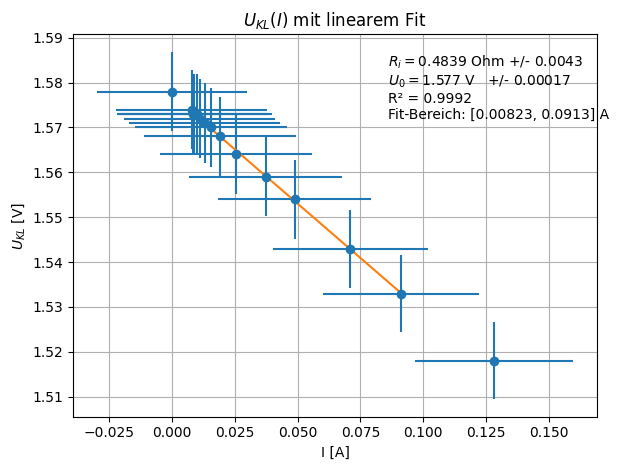

In [30]:
# -*- coding: utf-8 -*-
"""
Auswertung: Reale Spannungsquelle (Experiment 2, PW6)
- Keine Datei-Exporte: nur Konsole und angezeigte Diagramme
- Linearer Fit U_KL(I) im (auto-)gewaehlten linearen Bereich
- Bestimmung von R_i und U_0 mit Standardfehlern
- Optionaler Vergleich mit gemessener Leerlaufspannung\

Hinweis zum Modell:
U_KL = U_0 - I * R_i  -> Fit von y = a*x + b mit a ~ -R_i, b ~ U_0
"""
from typing import Optional
# ------------------------------
# Nutzereingaben
# ------------------------------

# Messdaten als Liste von Tupeln: (I_A, U_KL_V)
# Reihenfolge egal; das Skript sortiert nach I
DATA: List[Tuple[float, float]] = [
    # Beispielwerte; bitte durch eigene Messreihe ersetzen
    # (I_A, U_KL_V)
    (0.00, 1.578),
    (0.0078, 1.574), #200
    (0.00823, 1.573), #190
    (0.00867, 1.573), #180
    (0.00975, 1.573), #160
    (0.011, 1.572), #140
    (0.01295, 1.571), #120
    (0.01547, 1.57), #100 
    (0.01917, 1.568), #80
    (0.02532, 1.564), #60
    (0.03723, 1.559), #40
    (0.0488, 1.554), #30
    (0.0709, 1.543), #20
    (0.0913, 1.533), #15
    (0.1283, 1.518), #10
]

# Optional: gemessene Leerlaufspannung (Taster offen, I=0)
U0_OPEN_CIRCUIT_V: Optional[float] = 1.578  # oder None, wenn nicht gemessen

# Fit-Steuerung:
# Entweder expliziten Bereich in A angeben ...
FIT_I_MIN: Optional[float] = None   # z. B. 0.01
FIT_I_MAX: Optional[float] = None   # z. B. 0.07
# ... oder automatisch den "besten" linearen Abschnitt suchen
AUTO_WINDOW_MIN_POINTS = 5  # minimale Punktzahl fuer die automatische Fenstersuche


# ------------------------------
# Hilfsfunktionen
# ------------------------------
def sort_by_current(data):
    arr = np.array(data, dtype=float)
    idx = np.argsort(arr[:, 0])
    return arr[idx, 0], arr[idx, 1]  # I, U

def linear_fit_with_errors(x, y):
    """
    Linearer Fit y = a*x + b mit Standardfehlern.
    Rueckgabe: a, b, s_a, s_b, R2
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    n = len(x)
    if n < 2:
        raise ValueError("Zu wenige Punkte fuer linearen Fit.")
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    Sxx = np.sum((x - x_mean)**2)
    Sxy = np.sum((x - x_mean)*(y - y_mean))
    a = Sxy / Sxx
    b = y_mean - a * x_mean
    # Residuen und Varianz
    y_fit = a * x + b
    resid = y - y_fit
    RSS = np.sum(resid**2)
    s2 = RSS / (n - 2) if n > 2 else 0.0
    # Standardfehler (klassische Formeln)
    s_a = np.sqrt(s2 / Sxx) if Sxx > 0 else np.nan
    s_b = np.sqrt(s2 * (1.0/n + (x_mean**2) / Sxx)) if Sxx > 0 else np.nan
    # Bestimmtheitsmass
    TSS = np.sum((y - y_mean)**2)
    R2 = 1.0 - RSS / TSS if TSS > 0 else np.nan
    return a, b, s_a, s_b, R2, y_fit, resid

def choose_window_auto(I, U, min_points=5):
    """
    Sucht das Fenster mit maximalem R^2 fuer einen linearen Fit.
    Rueckgabe: slice(start, end_exclusive)
    """
    n = len(I)
    if n < min_points:
        raise ValueError("Zu wenige Datenpunkte fuer die automatische Fenstersuche.")
    best = (None, -np.inf, None)  # (slice, R2, (a,b,s_a,s_b))
    for start in range(0, n - min_points + 1):
        for end in range(start + min_points, n + 1):
            x = I[start:end]
            y = U[start:end]
            a, b, s_a, s_b, R2, _, _ = linear_fit_with_errors(x, y)
            if np.isfinite(R2) and R2 > best[1]:
                best = (slice(start, end), R2, (a, b, s_a, s_b))
    return best[0]  # bester Slice

def pick_fit_indices(I, fit_min, fit_max, auto_min_points):
    if fit_min is not None and fit_max is not None:
        sel = (I >= fit_min) & (I <= fit_max)
        idx = np.where(sel)[0]
        if len(idx) < 2:
            raise ValueError("Zu wenige Punkte im gewaehlten I-Bereich fuer den Fit.")
        return slice(idx[0], idx[-1] + 1), "manuell"
    # automatisch
    sl = choose_window_auto(I, U, min_points=auto_min_points)
    return sl, "auto"

# ------------------------------
# Hauptauswertung
# ------------------------------
if __name__ == "__main__":
    # Daten vorbereiten
    I, U = sort_by_current(DATA)

    dI = (np.array(I) * 0.012 + 3 * 0.01).tolist()
    dU = (np.array(U) * 0.005 + 0.001).tolist()

    # Fit-Bereich waehlen (manuell oder auto)
    fit_slice, fit_mode = pick_fit_indices(I, FIT_I_MIN, FIT_I_MAX, AUTO_WINDOW_MIN_POINTS)
    I_fit = I[fit_slice]
    U_fit = U[fit_slice]

    # Linearer Fit U = a*I + b
    a, b, s_a, s_b, R2, U_fit_vals, resid = linear_fit_with_errors(I_fit, U_fit)

    # Modellabbildung auf R_i und U_0
    # U_KL = U_0 - I * R_i -> a = dU/dI = -R_i, b = U_0
    R_i = -a
    s_Ri = s_a  # gleiche Groesse, Vorzeichenwechsel egal fuer die Unsicherheit
    U_0 = b
    s_U0 = s_b

    # Ausgabe fuer Protokoll
    print("=== Auswertung: Reale Spannungsquelle (PW6, Teil 2) ===")
    print(f"Fit-Bereich: I in [{I_fit.min():.6g}, {I_fit.max():.6g}] A,  Punkte: {len(I_fit)}")
    print(f"Lineares Modell: U_KL = U_0 - I * R_i  (entspricht  U = a*I + b)")
    print(f"Fit-Parameter:")
    print(f"  a = {a:.6g} V/A,  b = {b:.6g} V,  R^2 = {R2:.5f}")
    print("\nErgebnisse:")
    print(f"  Innenwiderstand  R_i = {R_i:.6g} Ohm  +/- {s_Ri:.2g} Ohm ")
    print(f"  Quellenspannung  U_0 = {U_0:.6g} V    +/- {s_U0:.2g} V")

    if U0_OPEN_CIRCUIT_V is not None:
        delta = U0_OPEN_CIRCUIT_V - U_0
        print(f"\nVergleich mit Leerlaufspannung:  U_open = {U0_OPEN_CIRCUIT_V:.6g} V")
        print(f"  Abweichung U_open - U_0 = {delta:.6g} V")

    # Diagramm 1: U_KL(I) mit Fit (nur ein Plot, keine Farben vorgegeben)
    plt.figure()
    plt.errorbar(I, U, marker="o", xerr=dI, yerr=dU, linestyle="")
    # Fit-Linie ueber dem Fitbereich
    I_line = np.linspace(I_fit.min(), I_fit.max(), 100)
    U_line = a * I_line + b
    plt.plot(I_line, U_line, linestyle="-")
    plt.xlabel("I [A]")
    plt.ylabel(r"$U_{KL}$ [V]")
    plt.title(r"$U_{KL}(I)$ mit linearem Fit")
    plt.grid(True)
    # Textbox mit Ergebnissen
    txt = (r"$R_i = $" + f"{R_i:.4g} Ohm +/- {s_Ri:.2g}\n"
           r"$U_0 =$"+ f"{U_0:.4g} V   +/- {s_U0:.2g}\n"
           f"R² = {R2:.4f}\n"
           f"Fit-Bereich: [{I_fit.min():.3g}, {I_fit.max():.3g}] A")
    plt.annotate(txt, xy=(0.6, 0.95), xycoords="axes fraction",
                 ha="left", va="top")

    plt.tight_layout()
    plt.show()